In [1]:
from multi_path_base import *
from scipy import interpolate
forecast_with_data=np.load('forecast_with_data.npy')

In [2]:
interp_points=1
forecast_data_inter= np.zeros((2,1217, interp_points*72 ))
x = np.arange(1,72+1,1)
xnew = np.arange(1,72+1,1/interp_points)
counter=0
i=0;j=0
while j< forecast_with_data.shape[0]:
    if  sum(1*np.isnan(forecast_with_data[j,:,1]))==0 and \
        sum(1*np.isnan(forecast_with_data[j,:,2]))==0 and \
        np.max(forecast_with_data[j,:,1])<=1 and \
        np.min(forecast_with_data[j,:,1])>=0 and \
        np.max(forecast_with_data[j,:,2])<=1 and \
        np.min(forecast_with_data[j,:,2])>=0:
        
        #tck_forecast = interpolate.splrep(x, forecast_with_data[j,:,1], s=0)
        #tck_data = interpolate.splrep(x, forecast_with_data[j,:,2], s=0)
        #forecast_data_inter[0,i,:]= interpolate.splev(xnew, tck_forecast, der=0)
        #forecast_data_inter[1,i,:]= interpolate.splev(xnew, tck_data, der=0)
        forecast_data_inter[0,i,:]= forecast_with_data[j,:,1]
        forecast_data_inter[1,i,:]= forecast_with_data[j,:,2]
        i+=1
    j+=1

In [3]:
N=forecast_data_inter.shape[2]
M=forecast_data_inter.shape[1]
#M=100
dt=1

#forecast_data_inter[0,:,:] #forecast

disct_temp = disct(N,dt,M)
p=forecast_data_inter[0,:,:]
V= forecast_data_inter[1,:,:] -forecast_data_inter[0,:,:]

this_model=model_beta_flex(disct_temp,V, forecast= p)


In [86]:
x = np.linspace(1, 15, 100)
y = np.linspace(1, 15, 100)

X, Y = np.meshgrid(x, y)

In [43]:
x = np.linspace(1, 15, 100)
y = np.linspace(1, 15, 100)

X, Y = np.meshgrid(x, y)

Z=np.zeros((len(y), len(x)))
for i in range(0,len(x)):
    for j in range(0,len(y)):
        Z[j,i] = this_model.likelihood(param=np.array((X[j,i],Y[j,i])))

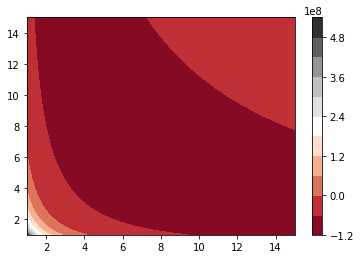

In [87]:
contours_1=plt.contourf(X, Y, Z, 10, cmap='RdGy')
plt.colorbar();

plt.savefig('ISO_lines.pdf')

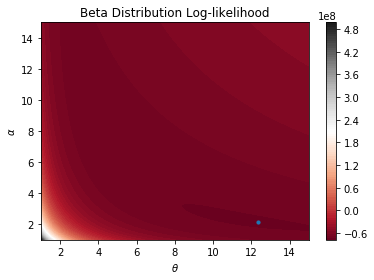

In [90]:
contours=plt.contourf(X, Y, Z, 100, cmap='RdGy')
plt.colorbar();
plt.title('Beta Distribution Log-likelihood') #,fontsize=24
plt.xlabel('$\\theta$')
plt.ylabel('$\\alpha$')
plt.scatter(12.32, 2.16, s=10)
plt.savefig('ISO_lines_detailed.pdf')

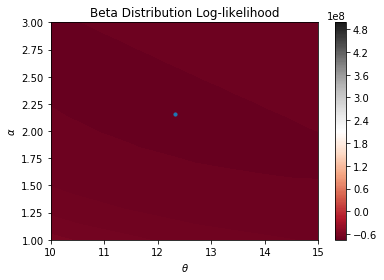

In [99]:
contours=plt.contourf(X, Y, Z, 200, cmap='RdGy')
plt.colorbar();
plt.title('Beta Distribution Log-likelihood') #,fontsize=24
plt.xlabel('$\\theta$')
plt.ylabel('$\\alpha$')
plt.xlim(10, 15)
plt.ylim(1, 3)
plt.scatter(12.32, 2.16, s=10)
plt.savefig('ISO_lines_detailed_zoom.pdf')

In [108]:
x1 = np.linspace(8, 20, 15)
y1 = np.linspace(1, 5, 15)

X1, Y1 = np.meshgrid(x1, y1)

Z2=np.zeros((len(y1), len(x1)))
for i in range(0,len(x1)):
    for j in range(0,len(y1)):
        Z2[j,i] = this_model.likelihood(param=np.array((X1[j,i],Y1[j,i])))

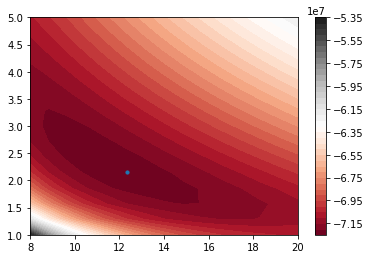

In [114]:
contours_3=plt.contourf(X1, Y1, Z2, 40, cmap='RdGy')
plt.colorbar();
plt.scatter(12.32, 2.16, s=10)

plt.savefig('ISO_lines_zoom_2.pdf')

(10, 10)